In [1]:
from dmi import DMI

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import datetime as dt

In [2]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
dmi = DMI('../data/token.txt')

In [48]:
START_DATE = '20190101'
END_DATE = '20210505'
LIMIT = '200000'

## Identify closest weather station

The Synop type weather stations include all meteorological observations data.

In [49]:
# Finding stations closest to Nr. Bjert and Strib based on Longitute & Latitude
stations = dmi.get_all_stations()
stations[(stations['lat'] >= 55.38679) & (stations['lat'] <= 55.60791) & \
         (stations['lon'] >= 9.26348) & (stations['lon'] <= 9.98789)]

,stationId,country,name,type,lat,lon
70,05400,DNK,Båring,Pluvio,55.4935,9.8953
162,23327,DNK,Kolding,Manual snow,55.4716,9.4847
179,28110,DNK,Båring,Manual snow,55.4927,9.8948


In [50]:
# Increasing the coordinate grid to include more weather stations
stations[(stations['lat'] >= 55.18679) & (stations['lat'] <= 55.71791) & \
         (stations['lon'] >= 9.16348) & (stations['lon'] <= 10.09789) & \
         (stations['type'] == 'Synop')]

,stationId,country,name,type,lat,lon
60,06123,DNK,Assens/Torø,Synop,55.2444,9.8882


It seems the closest weather station is around Assens, Funen.
This is about 33km from Strib, and 36km from Nr. Bjert.

## Weather Parameters
### Sunshine Minutes

In [51]:
sunshine = dmi.get_metdata(start_date=START_DATE, end_date=END_DATE, station_id='06123', field='sun_last1h_glob')
sunshine.index = sunshine['time']
sunshine.drop(columns=['parameterId', 'stationId', 'time'], inplace=True)
sunshine.sort_index(inplace=True)
sunshine = sunshine.resample('H').sum()
sunshine.fillna(method='bfill',inplace=True)
sunshine = sunshine.rename(columns={'value':'sunshine_mins'})

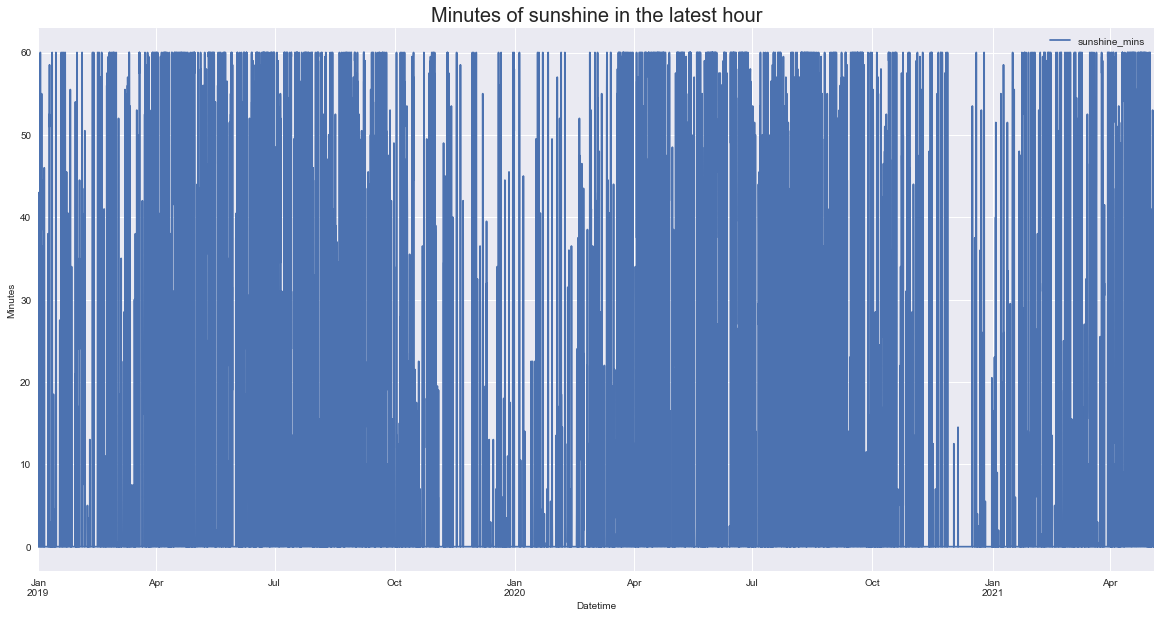

In [52]:
ax = sunshine.plot()
ax.set_title('Minutes of sunshine in the latest hour', fontsize=20)
ax.set_xlabel('Datetime', fontsize=10)
ax.set_ylabel('Minutes', fontsize=10)
plt.show()

In [53]:
# Trend
dcmp = sm.tsa.seasonal_decompose(sunshine)
sunshine_trend = dcmp.trend

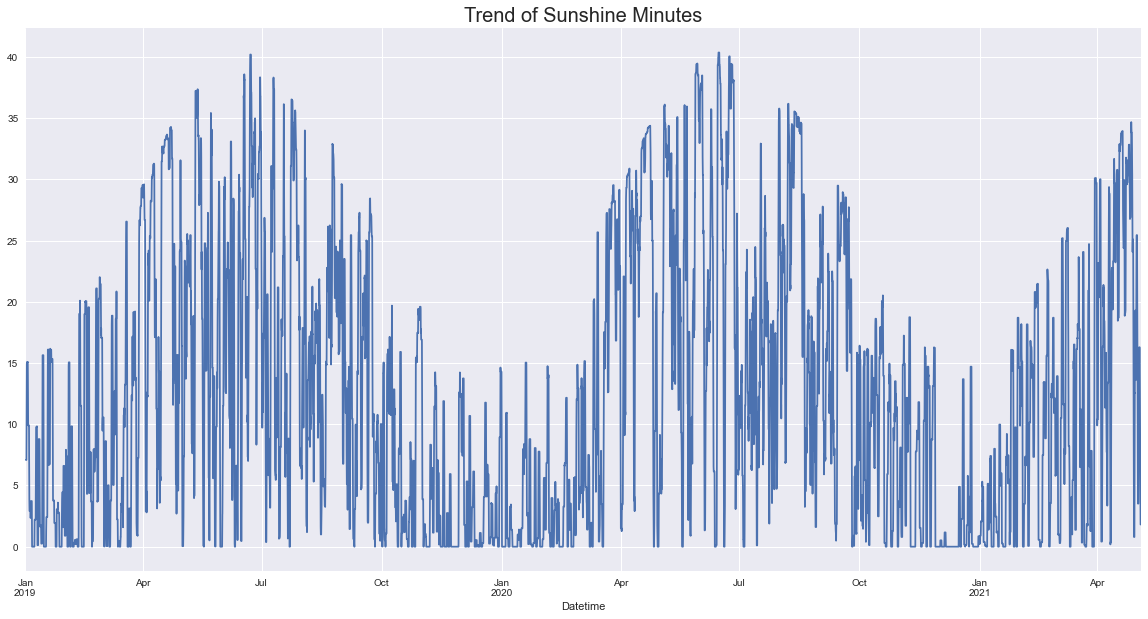

In [54]:
ax = sunshine_trend.plot()
ax.set_title('Trend of Sunshine Minutes', fontsize=20)
ax.set_xlabel('Datetime')
ax.set_ylabel('')
plt.show()

### Air Temperature

In [55]:
air_temp = dmi.get_metdata(start_date=START_DATE, end_date=END_DATE, station_id='06123', field='temp_dry', limit=LIMIT)
air_temp.index = air_temp.time
air_temp.drop(columns=['parameterId', 'stationId', 'time'], inplace=True)
air_temp.sort_index(inplace=True)
air_temp = air_temp.rename(columns={'value':'airtemp_c'})

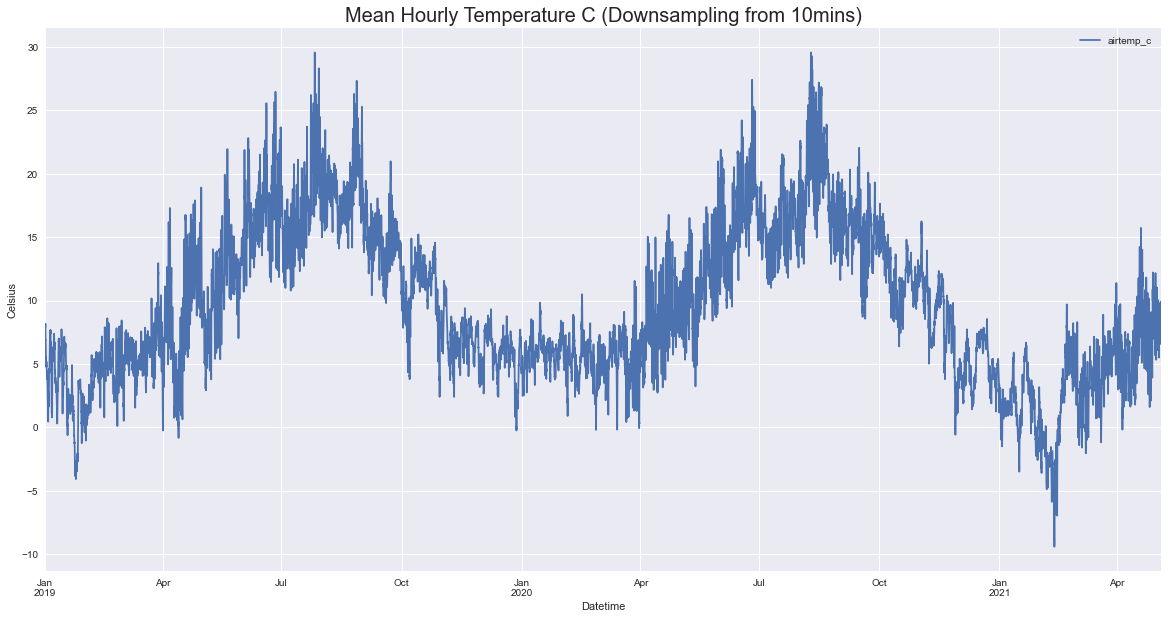

In [56]:
# Resample to hourly frequency to fit with data
air_temp = air_temp.resample('H').mean()
air_temp.fillna(method='bfill',inplace=True)

ax = air_temp.plot()
ax.set_title('Mean Hourly Temperature C (Downsampling from 10mins)', fontsize=20)
ax.set_xlabel('Datetime')
ax.set_ylabel('Celsius')
plt.show()

### Relative Humidity

In [57]:
rel_hum = dmi.get_metdata(start_date=START_DATE, end_date=END_DATE, station_id='06123', field='humidity', limit=LIMIT)
rel_hum.index = rel_hum.time
rel_hum.drop(columns=['parameterId', 'stationId', 'time'], inplace=True)
rel_hum.sort_index(inplace=True)
rel_hum = rel_hum.rename(columns={'value':'humidity_pct'})

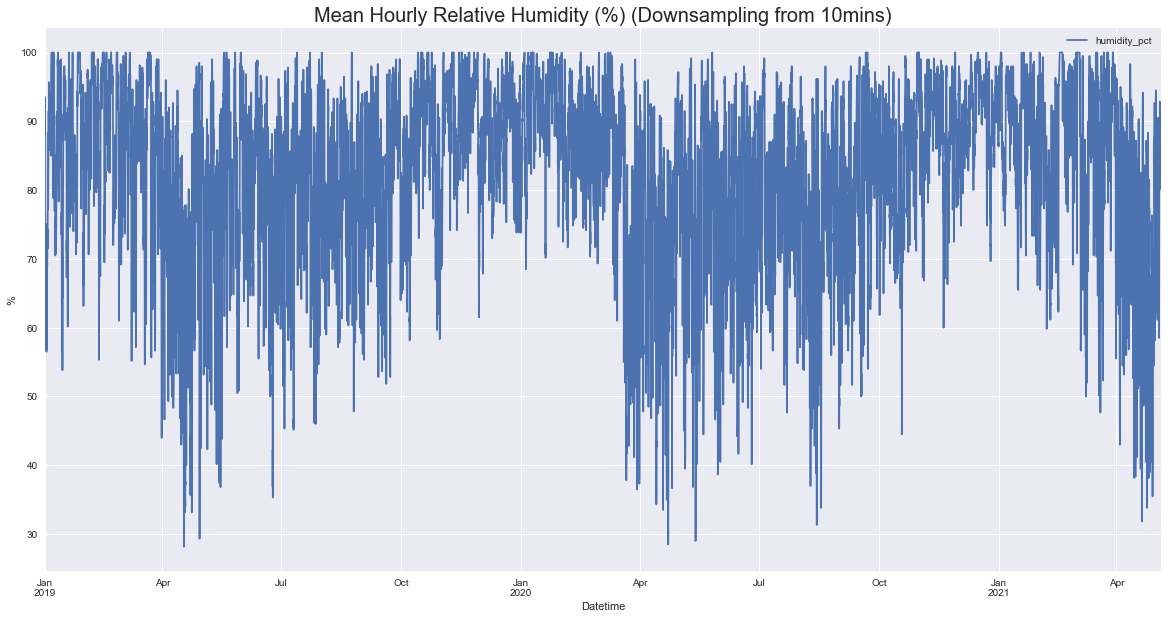

In [58]:
rel_hum = rel_hum.resample('H').mean()
rel_hum.fillna(method='bfill',inplace=True)

ax = rel_hum.plot()
ax.set_title('Mean Hourly Relative Humidity (%) (Downsampling from 10mins)', fontsize=20)
ax.set_xlabel('Datetime')
ax.set_ylabel('%')
plt.show()

In [59]:
dcmp = sm.tsa.seasonal_decompose(rel_hum)
humidity_trend = dcmp.trend

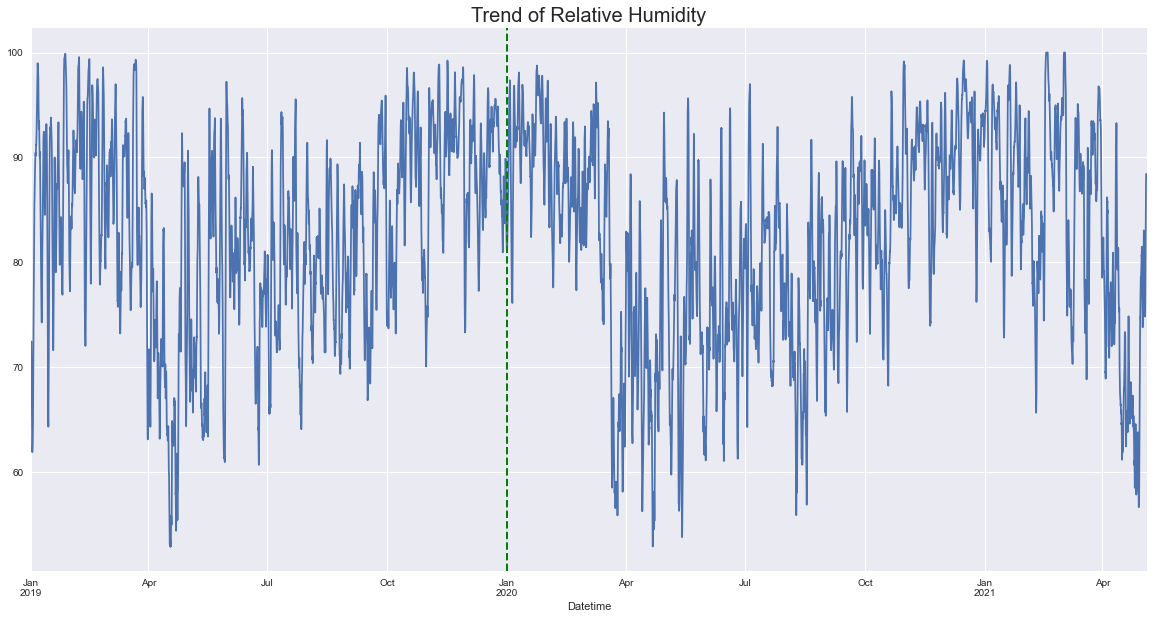

In [60]:
ax = humidity_trend.plot()
ax.set_title('Trend of Relative Humidity', fontsize=20)
ax.set_xlabel('Datetime')
ax.set_ylabel('')
ax.axvline('01-01-2020', color='green', linestyle='--', linewidth=2)
plt.show()

### Wind Speed

In [61]:
wind_spd = dmi.get_metdata(start_date=START_DATE, end_date=END_DATE, station_id='06123', field='wind_speed', limit=LIMIT)
wind_spd.index = wind_spd.time
wind_spd.drop(columns=['parameterId', 'stationId', 'time'], inplace=True)
wind_spd.sort_index(inplace=True)
wind_spd = wind_spd.rename(columns={'value':'windspeed_mps'})

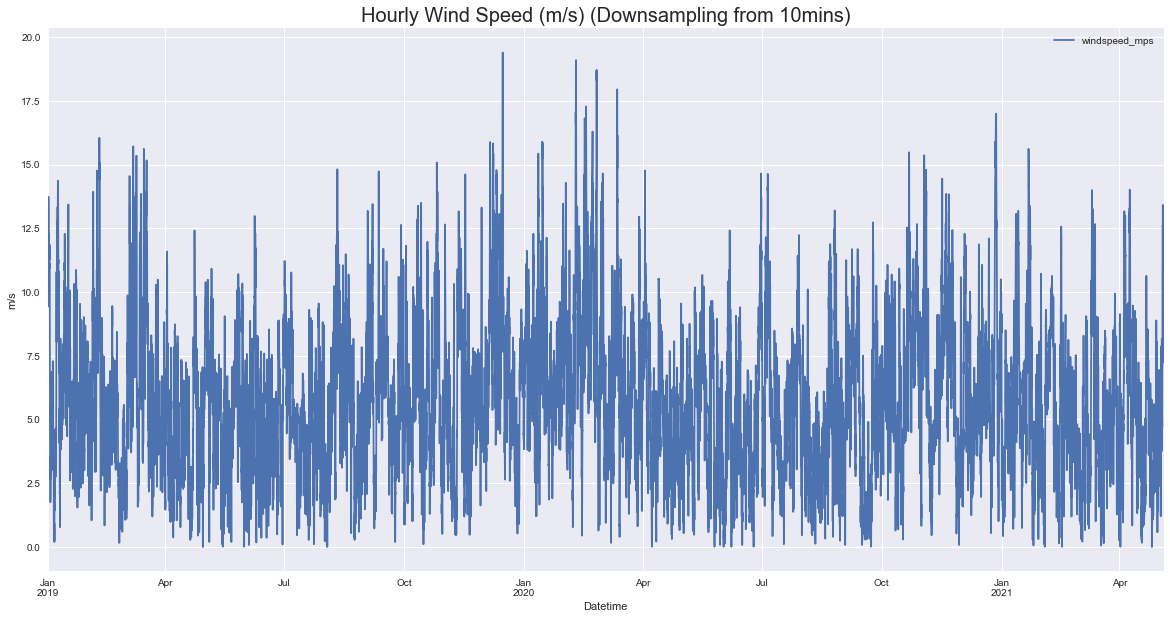

In [62]:
wind_spd = wind_spd.resample('H').mean()
wind_spd.fillna(method='bfill', inplace=True)

ax = wind_spd.plot()
ax.set_title('Hourly Wind Speed (m/s) (Downsampling from 10mins)', fontsize=20)
ax.set_xlabel('Datetime')
ax.set_ylabel('m/s')
plt.show()

In [63]:
dcmp = sm.tsa.seasonal_decompose(wind_spd)
windspeed_trend = dcmp.trend

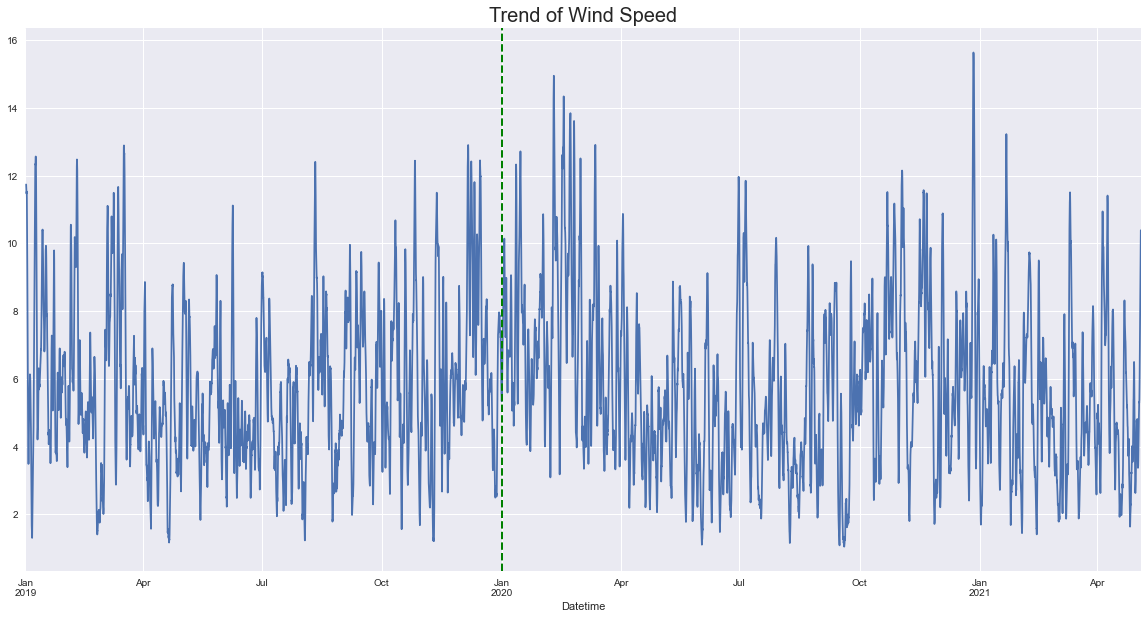

In [64]:
ax = windspeed_trend.plot()
ax.set_title('Trend of Wind Speed', fontsize=20)
ax.set_xlabel('Datetime')
ax.set_ylabel('')
ax.axvline('01-01-2020', color='green', linestyle='--', linewidth=2)
plt.show()

### Precipitation Duration
Minutes of Precipitation during the last hour.

In [65]:
# Note Weather Station has changed to Båring (closer to LivingLabs)
precip = dmi.get_metdata(start_date=START_DATE, end_date=END_DATE, station_id='05400', field='precip_dur_past1h', limit=LIMIT)
precip.index = precip.time
precip.drop(columns=['parameterId', 'stationId', 'time'], inplace=True)
precip.sort_index(inplace=True)
precip = precip.asfreq('H', method='bfill')
precip = precip.rename(columns={'value':'precip_mins'})

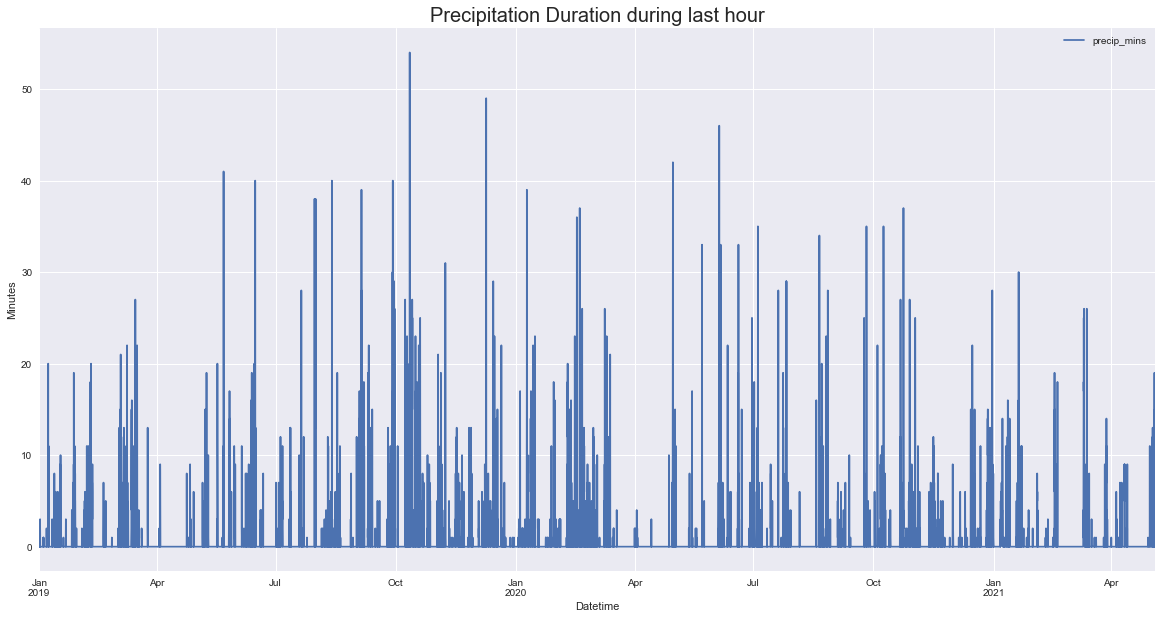

In [66]:
ax = precip.plot()
ax.set_title('Precipitation Duration during last hour', fontsize=20)
ax.set_xlabel('Datetime')
ax.set_ylabel('Minutes')
plt.show()

In [67]:
dcmp = sm.tsa.seasonal_decompose(precip)
precipdur_trend = dcmp.trend

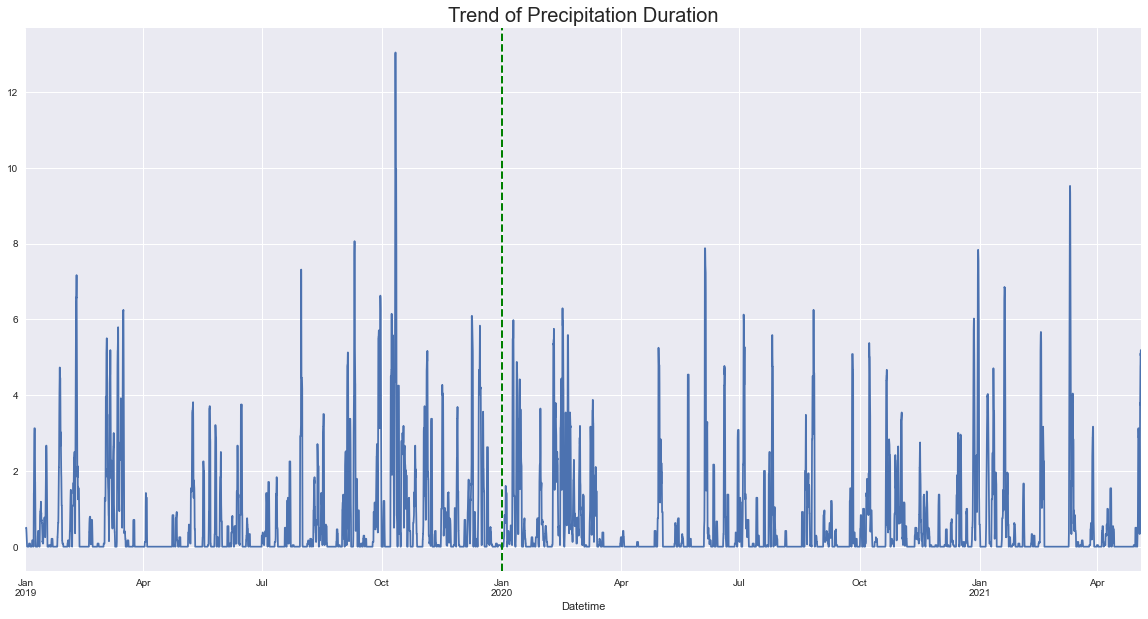

In [68]:
ax = precipdur_trend.plot()
ax.set_title('Trend of Precipitation Duration', fontsize=20)
ax.set_xlabel('Datetime')
ax.set_ylabel('')
ax.axvline('01-01-2020', color='green', linestyle='--', linewidth=2)
plt.show()

### Precipitation Amount

In [69]:
precip_mm = dmi.get_metdata(start_date=START_DATE, end_date=END_DATE, station_id='05400', field='precip_past1h', limit=LIMIT)
precip_mm.index = precip_mm.time
precip_mm.drop(columns=['parameterId', 'stationId', 'time'], inplace=True)
precip_mm.sort_index(inplace=True)
precip_mm = precip_mm.asfreq('H', method='bfill')
precip_mm = precip_mm.rename(columns={'value':'precip_mm'})
precip_mm.replace(-0.1, 0, inplace=True) # -0.1 = less than 0.1 mm

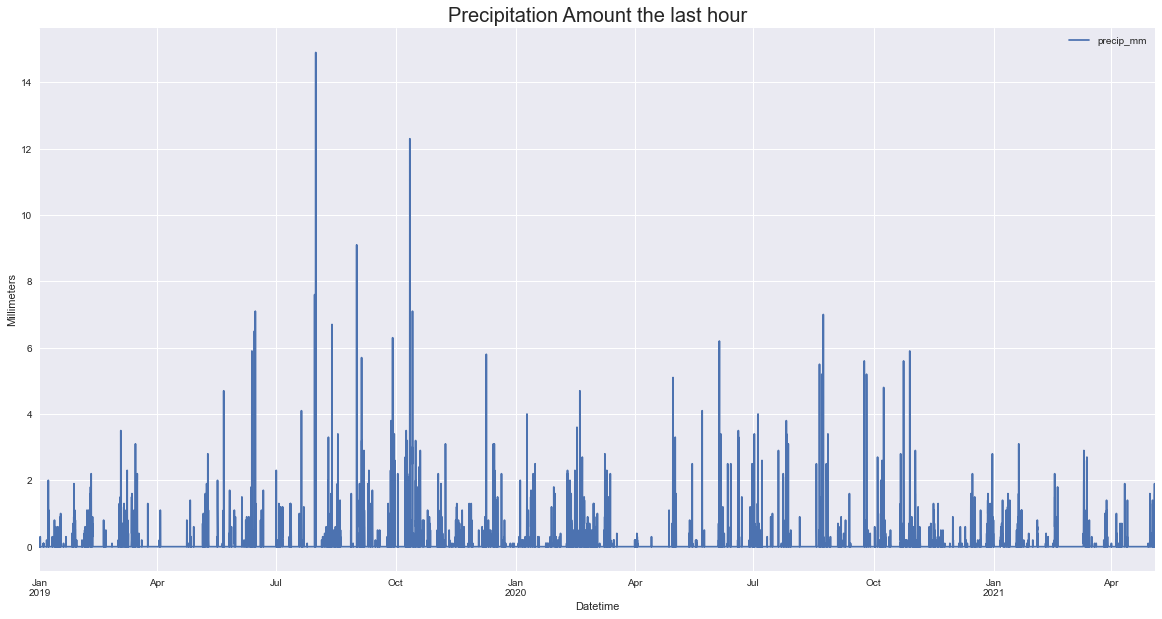

In [70]:
ax = precip_mm.plot()
ax.set_title('Precipitation Amount the last hour', fontsize=20)
ax.set_xlabel('Datetime')
ax.set_ylabel('Millimeters')
plt.show()

In [71]:
dcmp = sm.tsa.seasonal_decompose(precip_mm)
precipmm_trend = dcmp.trend

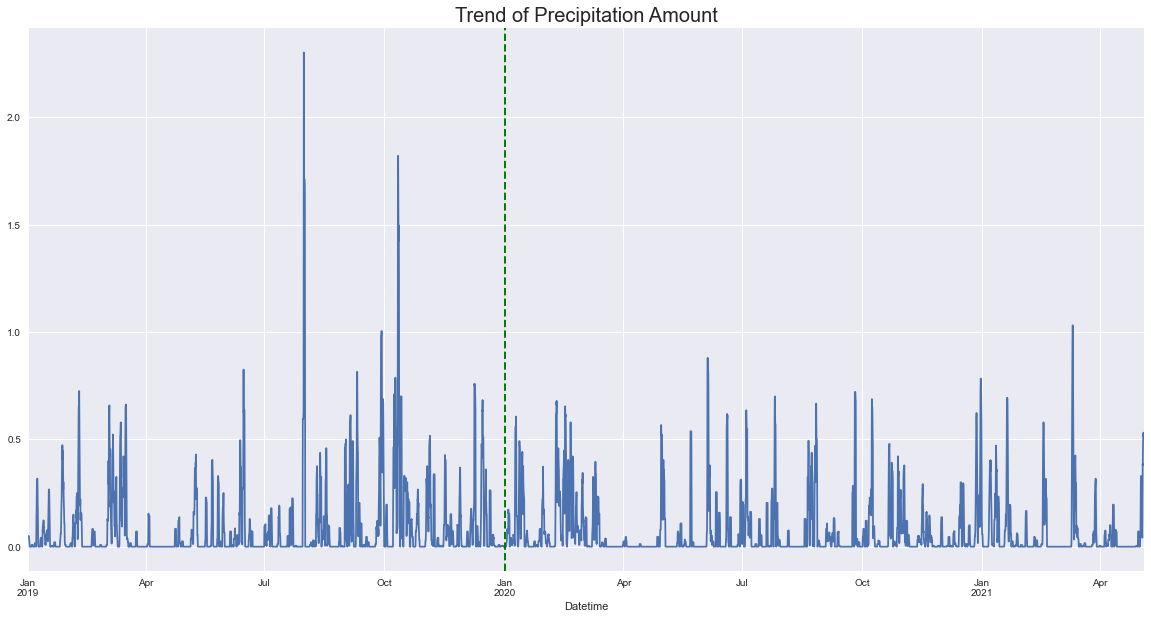

In [72]:
ax = precipmm_trend.plot()
ax.set_title('Trend of Precipitation Amount', fontsize=20)
ax.set_xlabel('Datetime')
ax.set_ylabel('')
ax.axvline('01-01-2020', color='green', linestyle='--', linewidth=2)
plt.show()

## Create Dataframe of Weather Features

In [76]:
features = [sunshine, air_temp, rel_hum, wind_spd, precip, precip_mm]

weather_df = pd.DataFrame(index=pd.date_range('01-01-2019','05-05-2021', freq='H'))
weather_df = weather_df.iloc[:-1]

In [77]:
for f in features:
    print(f.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20520 entries, 2019-01-01 00:00:00 to 2021-05-04 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sunshine_mins  20520 non-null  float64
dtypes: float64(1)
memory usage: 320.6 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20520 entries, 2019-01-01 00:00:00 to 2021-05-04 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   airtemp_c  20520 non-null  float64
dtypes: float64(1)
memory usage: 320.6 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20520 entries, 2019-01-01 00:00:00 to 2021-05-04 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   humidity_pct  20520 non-null  float64
dtypes: float64(1)
memory usage: 320.6 KB
None
<class 'pandas.core.frame

In [78]:
for f in features:
    weather_df[f'{str(f.columns[0])}'] = f.values

In [79]:
weather_df

,sunshine_mins,airtemp_c,humidity_pct,windspeed_mps,precip_mins,precip_mm
2019-01-01 00:00:00,0.0,7.850000,87.833333,11.716667,0.0,0.0
2019-01-01 01:00:00,0.0,7.883333,88.500000,11.983333,0.0,0.0
2019-01-01 02:00:00,0.0,7.850000,91.500000,11.183333,0.0,0.0
2019-01-01 03:00:00,0.0,7.983333,93.500000,10.516667,0.0,0.0
2019-01-01 04:00:00,0.0,8.166667,83.333333,12.666667,1.0,0.1
...,...,...,...,...,...,...
2021-05-04 19:00:00,0.0,7.950000,88.000000,8.633333,1.0,0.1
2021-05-04 20:00:00,0.0,7.683333,90.166667,7.250000,0.0,0.0
2021-05-04 21:00:00,0.0,7.650000,92.333333,7.233333,0.0,0.0
2021-05-04 22:00:00,0.0,7.783333,90.166667,9.016667,3.0,0.3


In [80]:
weather_df.describe()

,sunshine_mins,airtemp_c,humidity_pct,windspeed_mps,precip_mins,precip_mm
count,20520.000000,20520.000000,20520.000000,20520.000000,20520.000000,20520.000000
mean,12.534016,9.455829,82.438075,5.773409,0.695468,0.082047
std,21.518293,6.035450,12.777505,2.943939,2.941160,0.412935
min,0.000000,-9.416667,28.166667,0.000000,0.000000,0.000000
25%,0.000000,5.000000,75.166667,3.633333,0.000000,0.000000
50%,0.000000,8.033333,85.000000,5.466667,0.000000,0.000000
75%,18.000000,14.166667,92.166667,7.550000,0.000000,0.000000
max,60.000000,29.566667,100.000000,19.400000,54.000000,14.900000


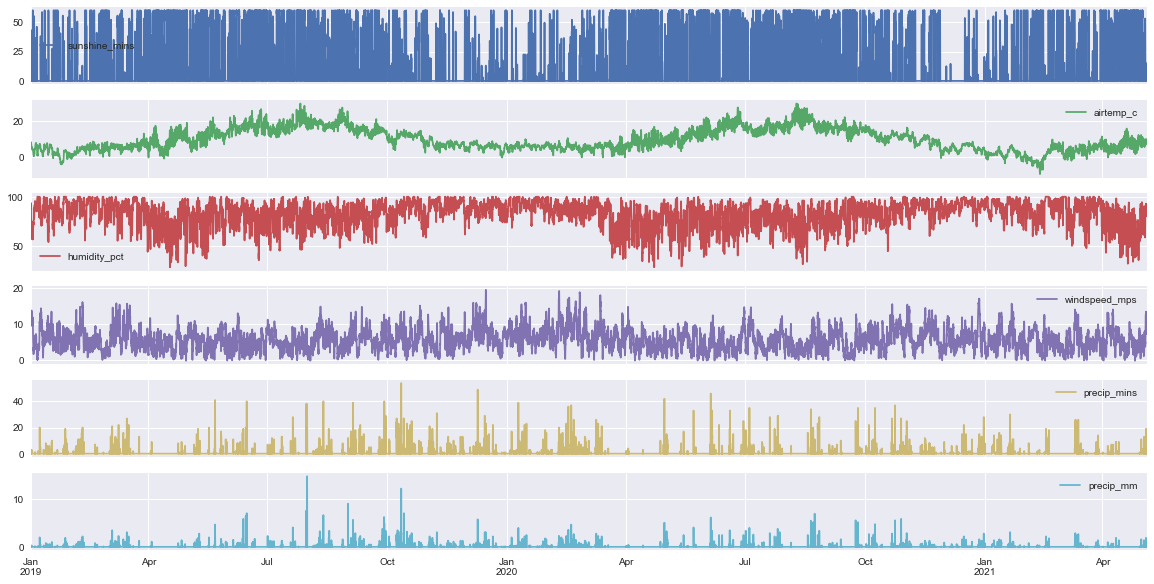

In [81]:
weather_df.plot(subplots=True)
plt.show()

In [82]:
weather_df.to_csv('../data/weather_features.csv', header=True, index_label='Datetime')